## DATA ANALYSIS WITH PANDAS AND MATPLOTLIB

In [3]:
import pandas as pd

# Load the Walmart dataset
data = pd.read_csv('shopee-products.csv')


# Display the head of the data
print(data.head())


                                                 url           id  \
0  https://shopee.com.mx/Camisa-Denim-Top-Retro-M...  21873056212   
1  https://shopee.com.mx/Sylvanian-Families-Happy...  28600553970   
2  https://shopee.cl/Dispositivo-De-Rescate-Para-...  18974847565   
3  https://shopee.co.id/(CUCI-GUDANG)-Sprei-Batan...  26453475612   
4  https://shopee.cl/Hombres-MAAP-Worlds-Pro-Hex-...  21567708790   

                                               title  sold  rating  reviews  \
0  Camisa Denim Top Retro Mujer Estilo Hong Kong ...     0     0.0        0   
1  Sylvanian Families Happy Breakfast toy set Chi...     0     0.0        0   
2  Dispositivo De Rescate Para Adultos Y Niños Po...     0     5.0        0   
3  (CUCI GUDANG) Sprei Batangan Ukuran 180x200 Ba...     0     4.5        0   
4  Hombres MAAP Worlds Pro Hex Jersey De Manga Co...     0     0.0        0   

   initial_price  final_price currency  stock  ...  category_id flash_sale  \
0         868.00        868.0   

In [4]:
# Display the Feature/Column names
print("Feature names:", data.columns)

Feature names: Index(['url', 'id', 'title', 'sold', 'rating', 'reviews', 'initial_price',
       'final_price', 'currency', 'stock', 'favorite', 'image', 'video',
       'seller_name', 'shop_url', 'breadcrumb', 'Product Specifications',
       'Product Description', 'seller_rating', 'seller_products',
       'seller_chats_responded_percentage', 'seller_chat_time_reply',
       'seller_joined_date', 'seller_followers', 'variations', 'domain',
       'brand', 'category_id', 'flash_sale', 'flash_sale_time',
       'product_variation', 'gmv_cal', 'category_url', 'vouchers',
       'is_available', 'seller_id', 'product_ratings'],
      dtype='object')


In [5]:
# Get summary statistics of numerical columns
summary_stats = data.describe()
print(summary_stats)

# Check for missing values
missing_values = data.isnull().sum()
print('These are the missing values:',missing_values)

                 id    sold       rating  reviews  initial_price  \
count  1.000000e+03  1000.0  1000.000000   1000.0   1.000000e+03   
mean   1.994156e+10     0.0     2.391700      0.0   3.185189e+05   
std    6.102381e+09     0.0     2.404667      0.0   3.528405e+06   
min    1.003032e+08     0.0     0.000000      0.0   7.800000e-01   
25%    1.692461e+10     0.0     0.000000      0.0   4.042250e+02   
50%    2.206209e+10     0.0     1.000000      0.0   1.182150e+04   
75%    2.453183e+10     0.0     4.900000      0.0   7.919025e+04   
max    2.995442e+10     0.0     5.000000      0.0   1.000000e+08   

        final_price  stock  favorite  video  seller_rating  seller_products  \
count  1.000000e+03  121.0    1000.0    0.0     1000.00000      1000.000000   
mean   2.701780e+05    0.0       0.0    NaN        3.39621      1903.302000   
std    3.397457e+06    0.0       0.0    NaN        2.05004      9595.354899   
min    7.800000e-01    0.0       0.0    NaN        0.00000         0.00

In [6]:
# Check the data types of each column
data_types = data.dtypes
print(data_types)

# Group by 'target' and compute the mean of each feature for each class
#grouped_mean = data.groupby('reviews').mean()
#print("Grouped mean of features per class:")
#print(grouped_mean)

url                                   object
id                                     int64
title                                 object
sold                                   int64
rating                               float64
reviews                                int64
initial_price                        float64
final_price                          float64
currency                              object
stock                                float64
favorite                               int64
image                                 object
video                                float64
seller_name                           object
shop_url                              object
breadcrumb                            object
Product Specifications                object
Product Description                   object
seller_rating                        float64
seller_products                        int64
seller_chats_responded_percentage      int64
seller_chat_time_reply                object
seller_joi

In [7]:
# Group by category and calculate the mean price
average_price_by_category = data.groupby('seller_followers')['seller_products'].mean()
print(average_price_by_category)

seller_followers
0             266.673077
1             431.254237
2             269.673913
3             292.241379
4             317.857143
               ...      
3905058      7737.000000
3905159      7737.000000
3905201      7737.000000
3905290      7737.000000
5594088    141166.000000
Name: seller_products, Length: 449, dtype: float64


In [8]:
# Filter Expensive products with a price greater than $100
expensive_products = data[data['final_price'] > 100]
print(expensive_products.head())

                                                 url           id  \
0  https://shopee.com.mx/Camisa-Denim-Top-Retro-M...  21873056212   
1  https://shopee.com.mx/Sylvanian-Families-Happy...  28600553970   
2  https://shopee.cl/Dispositivo-De-Rescate-Para-...  18974847565   
3  https://shopee.co.id/(CUCI-GUDANG)-Sprei-Batan...  26453475612   
4  https://shopee.cl/Hombres-MAAP-Worlds-Pro-Hex-...  21567708790   

                                               title  sold  rating  reviews  \
0  Camisa Denim Top Retro Mujer Estilo Hong Kong ...     0     0.0        0   
1  Sylvanian Families Happy Breakfast toy set Chi...     0     0.0        0   
2  Dispositivo De Rescate Para Adultos Y Niños Po...     0     5.0        0   
3  (CUCI GUDANG) Sprei Batangan Ukuran 180x200 Ba...     0     4.5        0   
4  Hombres MAAP Worlds Pro Hex Jersey De Manga Co...     0     0.0        0   

   initial_price  final_price currency  stock  ...  category_id flash_sale  \
0         868.00        868.0   

### DATA VISUALISATION

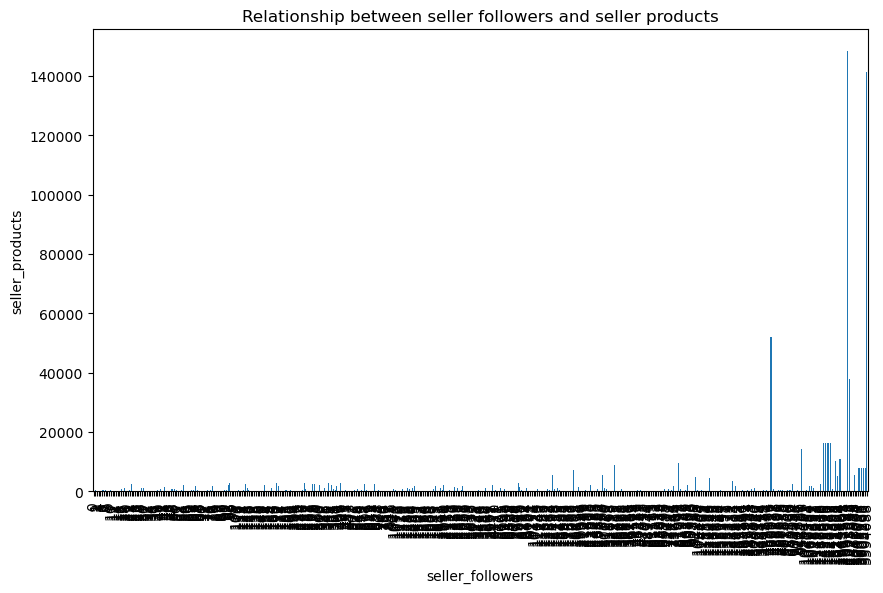

In [9]:
import matplotlib.pyplot as plt

# Group by category and calculate the mean price
average_price_by_category = data.groupby('seller_followers')['seller_products'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
average_price_by_category.plot(kind='bar')
plt.title('Relationship between seller followers and seller products')
plt.xlabel('seller_followers')
plt.ylabel('seller_products')
plt.show()

In [10]:
# List of column names to keep
columns_to_keep = ['seller_rating', 'seller_followers','reviews', 'seller_chats_responded_percentage','seller_rating','rating']

# Drop non-numeric columns
data_cleaned = data[columns_to_keep]

# Display the cleaned DataFrame
print(data_cleaned.head())

   seller_rating  seller_followers  reviews  \
0           4.51               174        0   
1           4.96                90        0   
2           4.51               230        0   
3           4.65            202901        0   
4           4.67                23        0   

   seller_chats_responded_percentage  seller_rating  rating  
0                                 57           4.51     0.0  
1                                 57           4.96     0.0  
2                                 57           4.51     5.0  
3                                 99           4.65     4.5  
4                                 57           4.67     0.0  


## CORRELLATION DOESN'T MEAN CAUSATION

In [11]:
# Calculate the correlation matrix
correlation_matrix = data_cleaned.corr()
print(correlation_matrix)

                                   seller_rating  seller_followers  reviews  \
seller_rating                           1.000000          0.174526      NaN   
seller_followers                        0.174526          1.000000      NaN   
reviews                                      NaN               NaN      NaN   
seller_chats_responded_percentage       0.387087          0.326649      NaN   
seller_rating                           1.000000          0.174526      NaN   
rating                                  0.276192          0.230155      NaN   

                                   seller_chats_responded_percentage  \
seller_rating                                               0.387087   
seller_followers                                            0.326649   
reviews                                                          NaN   
seller_chats_responded_percentage                           1.000000   
seller_rating                                               0.387087   
rating        

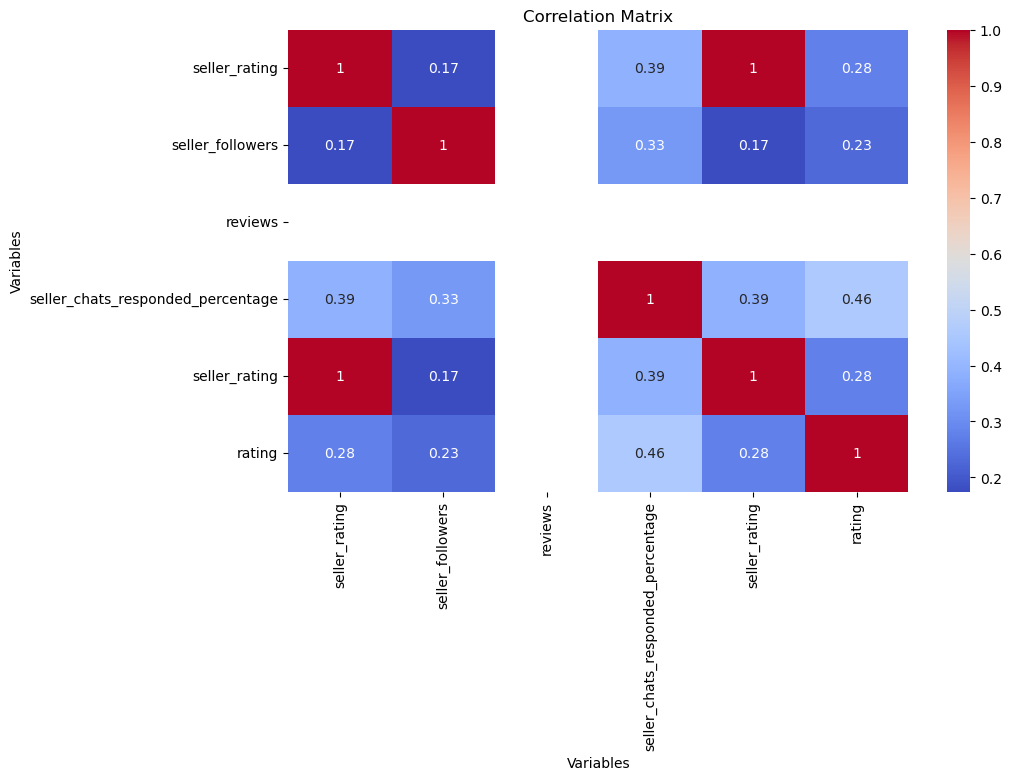

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data_cleaned.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

### CORRELATION WITH SPEARMANS, KENDALL & PEARSON

                                   seller_rating  seller_followers  reviews  \
seller_rating                           1.000000          0.656896      NaN   
seller_followers                        0.656896          1.000000      NaN   
reviews                                      NaN               NaN      NaN   
seller_chats_responded_percentage       0.475781          0.689375      NaN   
seller_rating                           1.000000          0.656896      NaN   
rating                                  0.366791          0.398733      NaN   

                                   seller_chats_responded_percentage  \
seller_rating                                               0.475781   
seller_followers                                            0.689375   
reviews                                                          NaN   
seller_chats_responded_percentage                           1.000000   
seller_rating                                               0.475781   
rating        

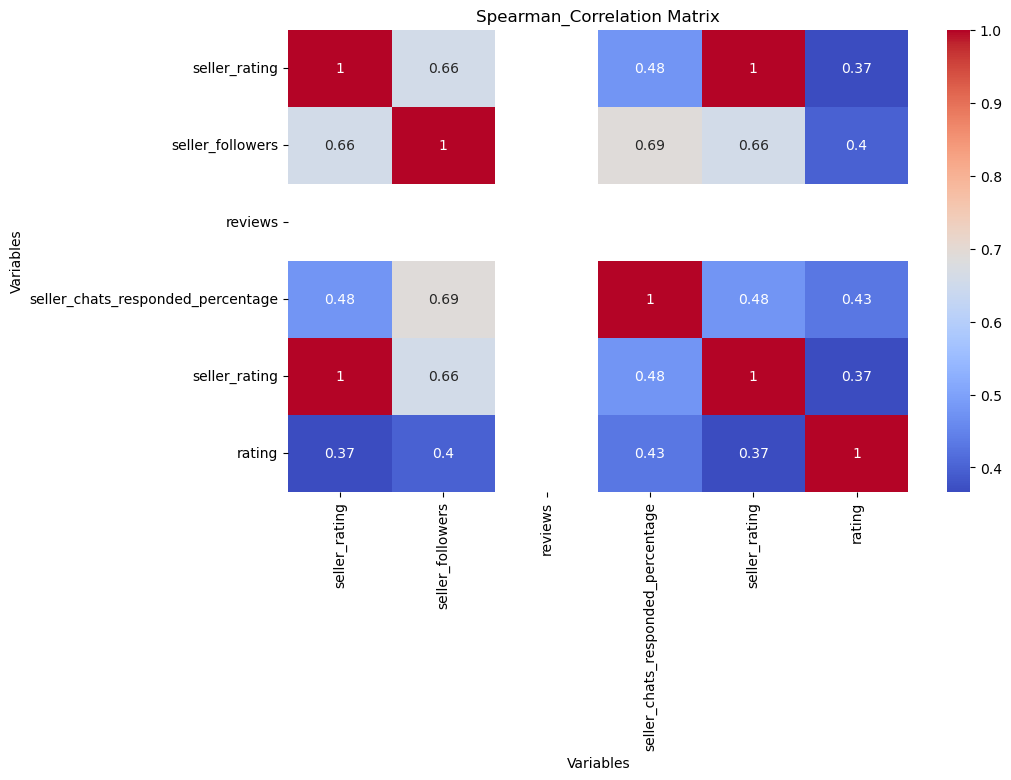

In [13]:
from scipy.stats import spearmanr

# Calculate Spearman rank correlation coefficients for each pair of columns
spearman_correlations = data_cleaned.corr(method='spearman')

print(spearman_correlations)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(spearman_correlations, annot=True, cmap='coolwarm')
plt.title('Spearman_Correlation Matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

                                   seller_rating  seller_followers  reviews  \
seller_rating                           1.000000          0.517063      NaN   
seller_followers                        0.517063          1.000000      NaN   
reviews                                      NaN               NaN      1.0   
seller_chats_responded_percentage       0.378105          0.536595      NaN   
seller_rating                           1.000000          0.517063      NaN   
rating                                  0.309917          0.301386      NaN   

                                   seller_chats_responded_percentage  \
seller_rating                                               0.378105   
seller_followers                                            0.536595   
reviews                                                          NaN   
seller_chats_responded_percentage                           1.000000   
seller_rating                                               0.378105   
rating        

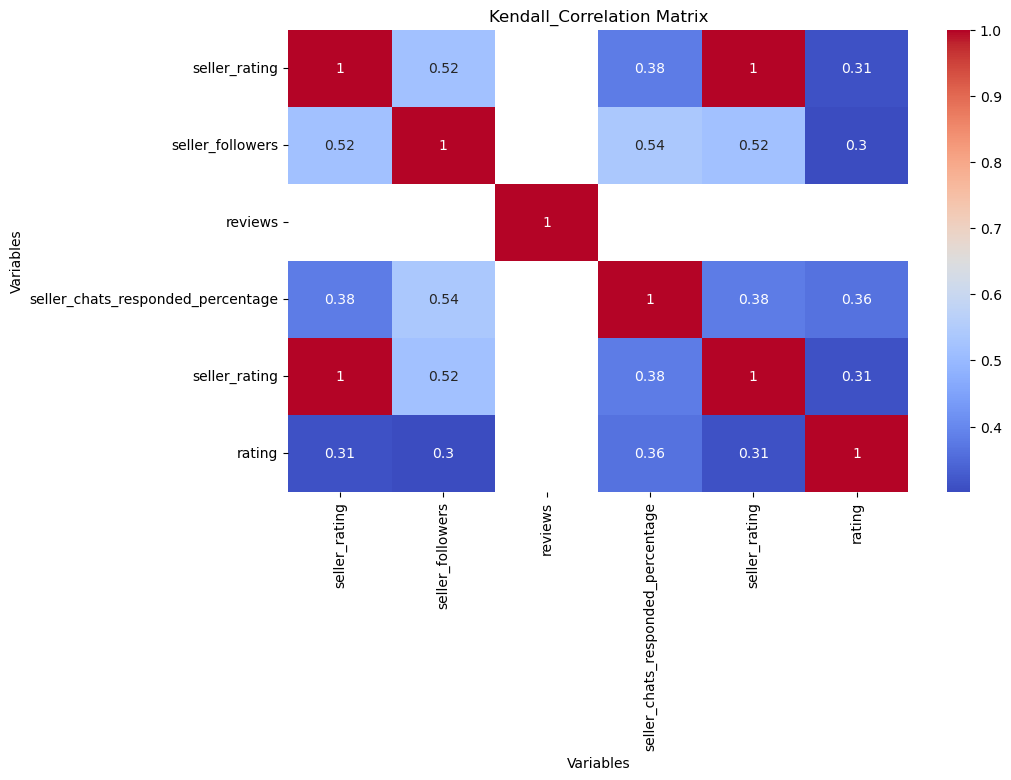

In [14]:
import pandas as pd
from scipy.stats import kendalltau

# Calculate Kendall rank correlation coefficients for each pair of columns
kendall_correlations = data_cleaned.corr(method='kendall')

print(kendall_correlations)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(kendall_correlations, annot=True, cmap='coolwarm')
plt.title('Kendall_Correlation Matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

                                   seller_rating  seller_followers  reviews  \
seller_rating                           1.000000          0.174526      NaN   
seller_followers                        0.174526          1.000000      NaN   
reviews                                      NaN               NaN      NaN   
seller_chats_responded_percentage       0.387087          0.326649      NaN   
seller_rating                           1.000000          0.174526      NaN   
rating                                  0.276192          0.230155      NaN   

                                   seller_chats_responded_percentage  \
seller_rating                                               0.387087   
seller_followers                                            0.326649   
reviews                                                          NaN   
seller_chats_responded_percentage                           1.000000   
seller_rating                                               0.387087   
rating        

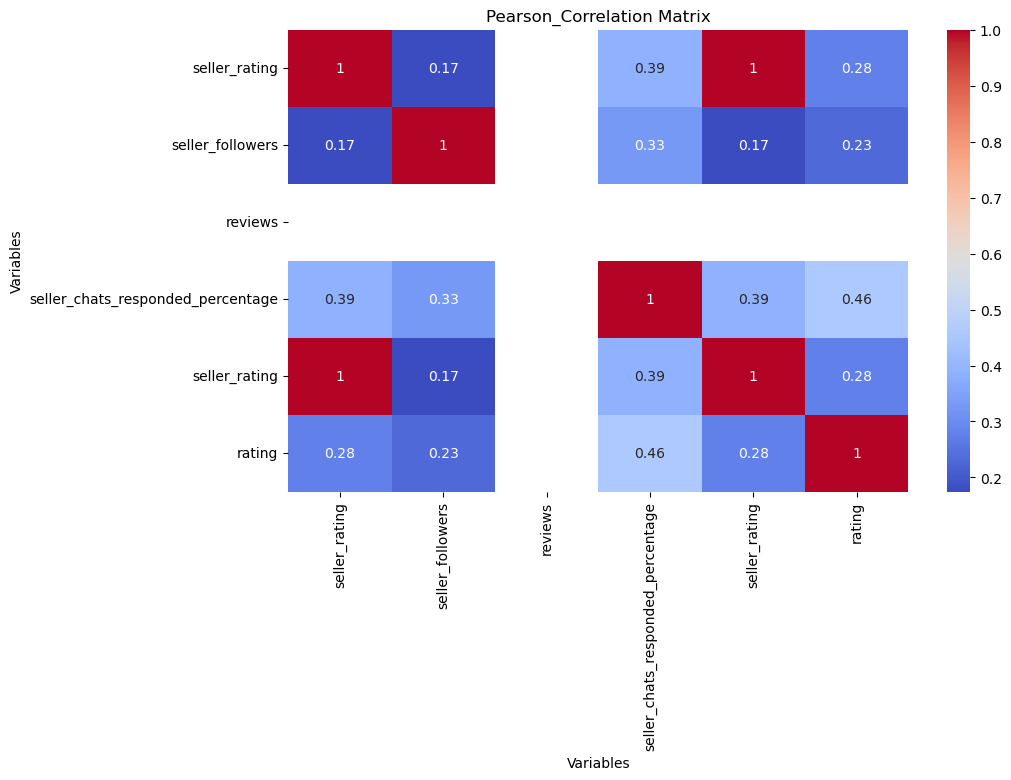

In [15]:
import pandas as pd

# Calculate Pearson correlation coefficients for each pair of columns
pd_correlations = data_cleaned.corr(method='pearson')

print(pd_correlations)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pd_correlations, annot=True, cmap='coolwarm')
plt.title('Pearson_Correlation Matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

## LINE GRAPH, HISTOGRAM AND SCATTER PLOTS

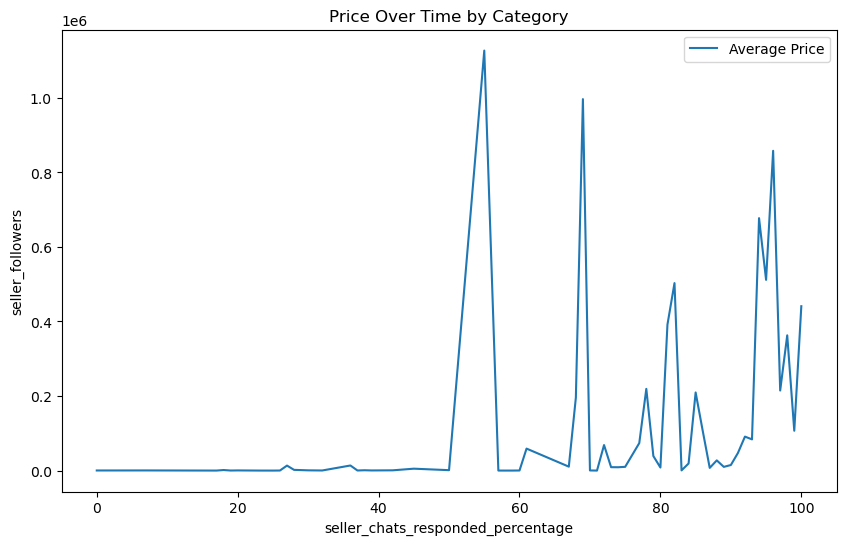

In [18]:
#LINE GRAPH
import matplotlib.pyplot as plt

# Plotting the price over time for each category
plt.figure(figsize=(10, 6))

category_data = data_cleaned.groupby('seller_chats_responded_percentage')['seller_followers'].mean().reset_index()
plt.plot(category_data['seller_chats_responded_percentage'], category_data['seller_followers'], label='Average Price')

plt.title('Price Over Time by Category')
plt.xlabel('seller_chats_responded_percentage')
plt.ylabel('seller_followers')
plt.legend()
plt.show()

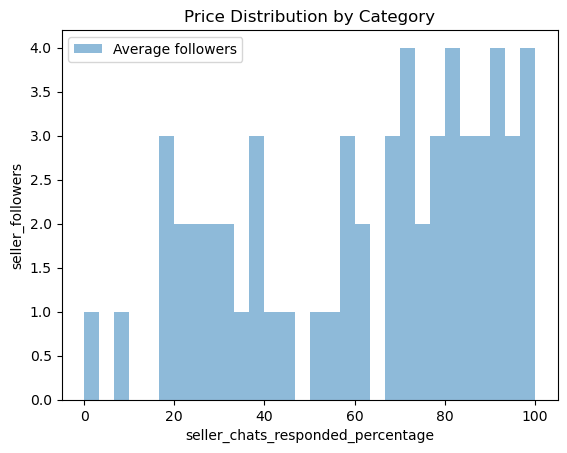

In [20]:
import matplotlib.pyplot as plt

# Plotting the price distribution for each category
category_data = data_cleaned.groupby('seller_chats_responded_percentage')['seller_followers'].mean().reset_index()
plt.hist(category_data['seller_chats_responded_percentage'], bins=30, alpha=0.5, label='Average followers')

plt.title('Price Distribution by Category')
plt.xlabel('seller_chats_responded_percentage')
plt.ylabel('seller_followers')
plt.legend()
plt.show()

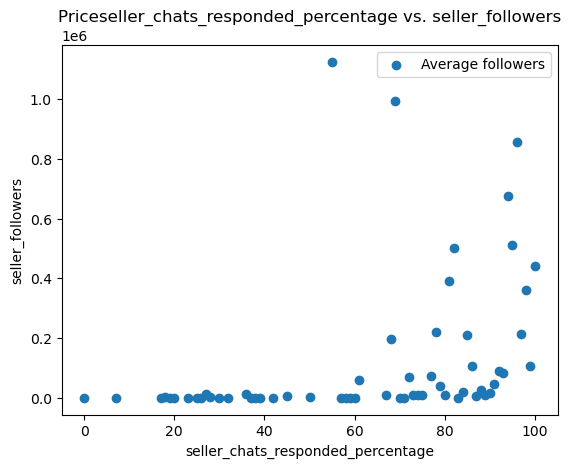

In [ ]:
import matplotlib.pyplot as plt

# Plotting the price vs. category for each product
product_data = data_cleaned.groupby('seller_chats_responded_percentage')['seller_followers'].mean().reset_index()
plt.scatter(product_data['seller_chats_responded_percentage'], product_data['seller_followers'], label='Average followers')

plt.title('seller_chats_responded_percentage vs. seller_followers')
plt.xlabel('seller_chats_responded_percentage')
plt.ylabel('seller_followers')
plt.legend()
plt.show()